In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'/home/ubundu/Downloads/Customer Segmentation.csv')
df.head()

,Unnamed: 0,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,460394,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6,D
1,1,461798,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6,A
2,2,464976,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4,D
3,3,462104,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3,D
4,4,464829,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4,D


In [4]:
df.shape

(10695, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10695 non-null  int64  
 1   ID               10695 non-null  int64  
 2   Gender           10695 non-null  object 
 3   Ever_Married     10505 non-null  object 
 4   Age              10695 non-null  int64  
 5   Graduated        10593 non-null  object 
 6   Profession       10533 non-null  object 
 7   Work_Experience  9597 non-null   float64
 8   Spending_Score   10695 non-null  object 
 9   Family_Size      10247 non-null  float64
 10  Var_1            10587 non-null  object 
 11  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1002.8+ KB


In [6]:
df.corr

<bound method DataFrame.corr of        Unnamed: 0      ID  Gender Ever_Married  Age Graduated     Profession  \
0               0  460394  Female           No   32       Yes     Healthcare   
1               1  461798  Female           No   56       Yes         Artist   
2               2  464976    Male          Yes   75        No         Lawyer   
3               3  462104    Male          Yes   39        No  Entertainment   
4               4  464829    Male           No   22        No     Healthcare   
...           ...     ...     ...          ...  ...       ...            ...   
10690       10690  462861  Female           No   30       Yes     Healthcare   
10691       10691  464409  Female          Yes   81       Yes         Lawyer   
10692       10692  465861  Female           No   40       Yes  Entertainment   
10693       10693  465056    Male          Yes   87       Yes         Lawyer   
10694       10694  461637    Male          Yes   51       Yes         Artist   

       

In [7]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
df['Gender']=label.fit_transform(df['Gender'])
df['Ever_Married']=label.fit_transform(df['Ever_Married'])
df['Graduated']=label.fit_transform(df['Graduated'])
df['Profession']=label.fit_transform(df['Profession'])
df['Spending_Score']=label.fit_transform(df['Spending_Score'])
df['Var_1']=label.fit_transform(df['Var_1'])
df['Segmentation']=label.fit_transform(df['Segmentation'])


In [8]:
df.isna().sum()

Unnamed: 0            0
ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1                 0
Segmentation          0
dtype: int64

In [9]:
df['Ever_Married']=df['Ever_Married'].fillna(df['Ever_Married'].median())
df['Graduated']=df['Graduated'].fillna(df['Graduated'].median())
df['Profession']=df['Profession'].fillna(df['Profession'].median())
df['Work_Experience']=df['Work_Experience'].fillna(df['Work_Experience'].median())
df['Family_Size']=df['Family_Size'].fillna(df['Family_Size'].median())
df['Var_1']=df['Var_1'].fillna(df['Var_1'].median())

In [10]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_value=scale.fit_transform(df)

In [11]:
x= x_value
y=df['Segmentation']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [13]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [14]:
svm_pred=svm.predict(x_test)
svm_pred

array([1, 3, 1, ..., 1, 0, 3])

In [15]:
svm.score(x_test,y_test)

1.0

In [ ]:
kernel1=SVC(kernel='linear')
kernel1.fit(x_train,y_train)

In [ ]:
kernel1.score(x_test,y_test)

In [ ]:
kernel2=SVC(kernel='poly')
kernel2.fit(x_train,y_train)

In [ ]:
kernel2.score(x_test,y_test)

In [ ]:
kernel3=SVC(kernel='rbf')
kernel3.fit(x_train,y_train)

In [ ]:
kernel3.score(x_test,y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

In [ ]:
log=logistic.predict(x_test)


In [ ]:
logistic.score(x_test,y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

In [ ]:
knn.score(x_test,y_test)

In [ ]:
accuracy_rate=[]
for i in range(1,40):


    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score=knn.score(x_test,y_test)
    accuracy_rate.append(score)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('k_value')
plt.ylabel('accuracy_rate')

In [ ]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',marker='o',linestyle='dashed',
        markerfacecolor='green',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_value')
plt.ylabel('Error rate')

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train,y_train)
knn1.score(x_test,y_test)

In [ ]:
knn2=KNeighborsClassifier(n_neighbors=6)
knn2.fit(x_train,y_train)
knn2.score(x_test,y_test)

In [ ]:
knn3=KNeighborsClassifier(n_neighbors=8)
knn3.fit(x_train,y_train)
knn3.score(x_test,y_test)

In [ ]:
knn_predict=knn1.predict(x_test)

In [ ]:
plt.plot(knn_predict,color='blue',linestyle='-',marker='o')
plt.title('Customer Excitment')  
plt.xlabel('Data points')  
plt.ylabel('Data values')

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)

In [ ]:
naiving=naive.predict(x_test)

In [ ]:
naive.score(x_test,y_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
random_predict=random.predict(x_test)
random_predict

array([1, 3, 1, ..., 1, 0, 3])

In [26]:
random.score(x_test,y_test)

1.0

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

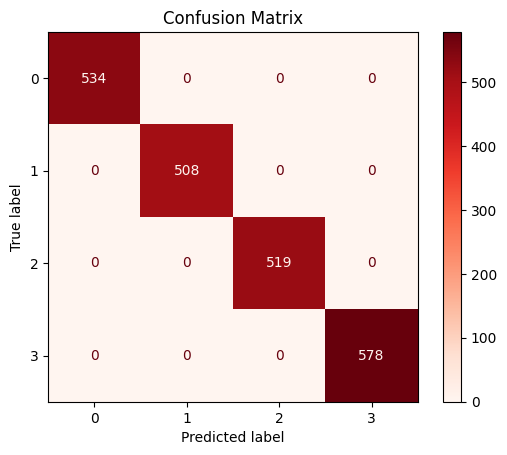

In [28]:
cm = confusion_matrix(y_test, random_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()

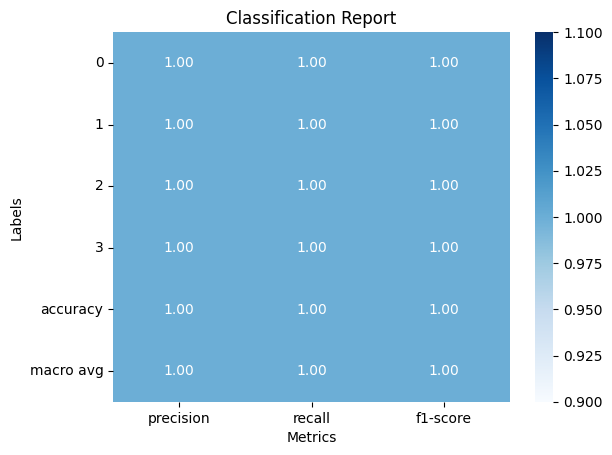

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report as dictionary
report = classification_report(y_test, random_predict, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Plot the basic heatmap
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Labels')
plt.show()


In [30]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
tree.predict(x_test)

array([1, 3, 1, ..., 1, 0, 3])

In [18]:
tree.score(x_test,y_test)

1.0

In [19]:
import xgboost as xgb
boost = xgb.XGBClassifier()
boost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [20]:
boosting=boost.predict(x_test)

In [21]:
boost.score(x_test,y_test)

1.0

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [ ]:

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [1, 5, 10]
}

gdc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, return_train_score=True)

In [ ]:
gdc

In [ ]:
gdc.fit(x,y)

In [ ]:
gdc.best_params_

In [ ]:

from sklearn import svm

model_params = {
    'svm': {
        'model': svm.SVC(),
        'params': {
            'gamma': [1, 10, 20],
            'C': [1, 10, 20],
            'kernel': ['rbf', 'poly', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    }
}


In [ ]:
scores=[]
for model_name in model_params:
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x,y)
    scores.append({'model':model_name,'best_score':gds.best_score_,'best_params':gds.best_params_})

In [ ]:
scores

In [ ]:
models={'logistic':{'model':LogisticRegression(),'params':{}},
        'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,10,20,100]}},
        'decision_tree':{'model':DecisionTreeClassifier(),'params':{}},
        'Gaussian':{'model':GaussianNB(),'params':{}},
        'Bernauli':{'model':BernoulliNB(),'params':{}},
        'SVM':{'model':SVC(),'params':{'gamma':[1,2,100],'C':[1,2,5,100],'kernel':['poly','linear','sigmoid','rbf']}}}

result=[]
for i in models:
    a=models.get(i)
    model=a.get('model')
    params=a.get('params')
    cv=GridSearchCV(model,params,cv=5,return_train_score=True)
    cv.fit(x,y)
    bp=cv.best_params_
    bs=cv.best_score_
    t_res={'model':i,'best_params':bp,'best_score':bs}
    result.append(t_res)
f=pd.DataFrame(result)
        